# 문제정의 
## 영화관객 수 예측
감독, 이름, 상영등급, 스태프 수 등의 정보로 영화 관객 수를 예측하는 모델을 만들고자 한다. 
- y: next_arrive_time
- x: 영화 관객 수에 영향을 주는 요소들(Data Set에서 columns)

### 데이터 불러오기

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [77]:
train = pd.read_csv('./movies_train.csv')
test = pd.read_csv('./movies_test.csv')


### 데이터프레임 정보 확인하기

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [79]:
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083


1. title : 영화 제목    
2. distributor: 배급사     
3. genre : 영화 장르         
4. release_time: 개봉일
5. time: 상영시간(분)            
6. screening_rat: 상영등급
7. director: 감독        
8. dir_prev_bfnum : 해당 감독이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수
9. dir_prev_num : 해당 감독이 영화를 만들기 전 제작에 참여한 영화의 개수
10. num_staff: 스태프 수       
11. num_actor: 배우 수    
12. box_off_num: 관객 수 

In [80]:
### 결측치를 찾음 
train.isnull().sum()
## dir_prev_bfnum 에 결측치가 있음. 아마 제작에 참여한 적이 없는 것 같음

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [81]:
train[train['dir_prev_bfnum'].isnull()]
# dir_prev_num에 0이 대입되어 있으니 dir_prev_bfnum에 0을 집어넣음 

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [82]:
train['dir_prev_bfnum'] = train['dir_prev_bfnum'].fillna(0)

In [83]:
train.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [84]:
## release_time을 year, month로 따로 컬럼을 만들어줌
train['release_time'] = pd.to_datetime(train['release_time'])
train['year'] = train['release_time'].apply(lambda x: x.year )
train['month'] = train['release_time'].apply(lambda x: x.month )

In [85]:
train.head(2)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00000,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501,2015,11


### 종속변수 탐색

In [86]:
pd.options.display.float_format = '{:.5f}'.format
# 지수표현식이 아닌 실수표현으로 보기 위한 설정

In [87]:
# 종속변수의 기초통계량을 살펴봄
train['box_off_num'].describe()

count        600.00000
mean      708181.75167
std      1828005.85114
min            1.00000
25%         1297.25000
50%        12591.00000
75%       479886.75000
max     14262766.00000
Name: box_off_num, dtype: float64

<Axes: >

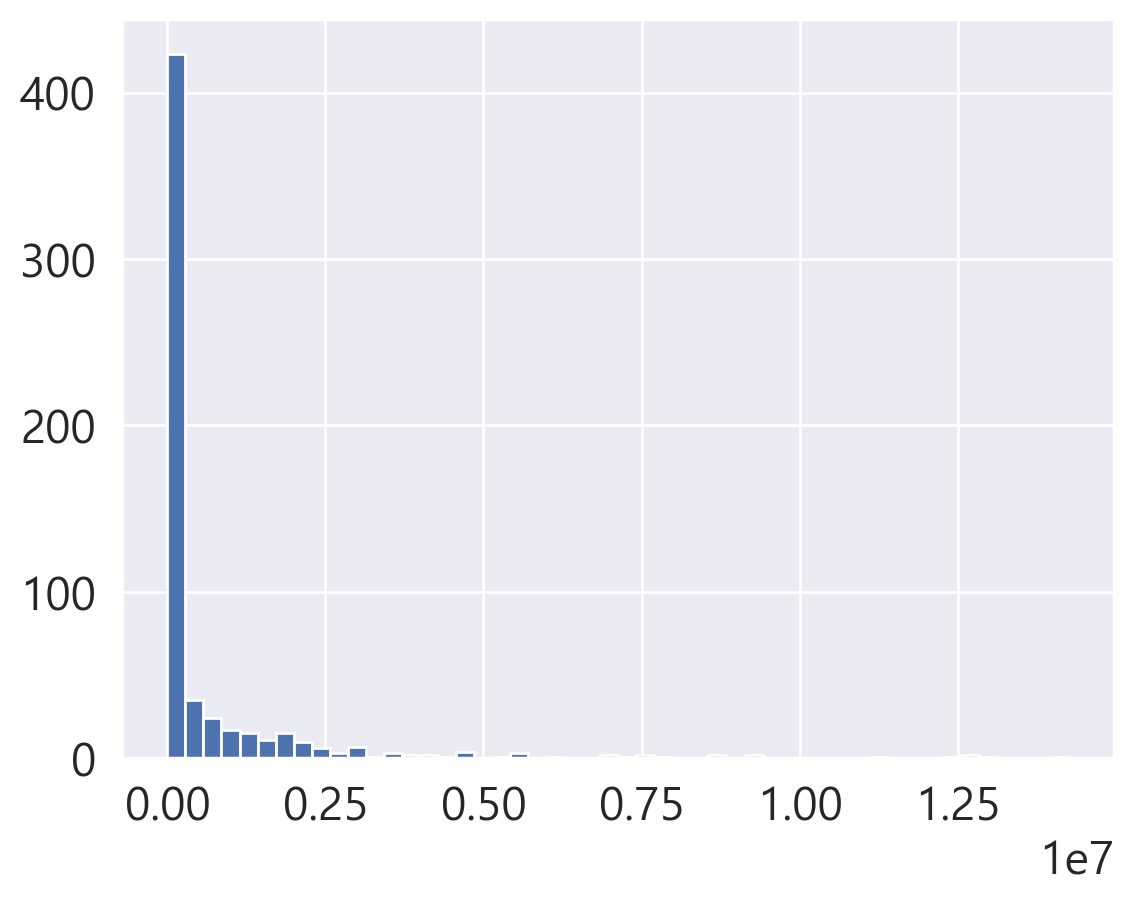

In [88]:
# 시각화
train['box_off_num'].hist(bins=50)
# 0에 가까운 숫자가 많다..

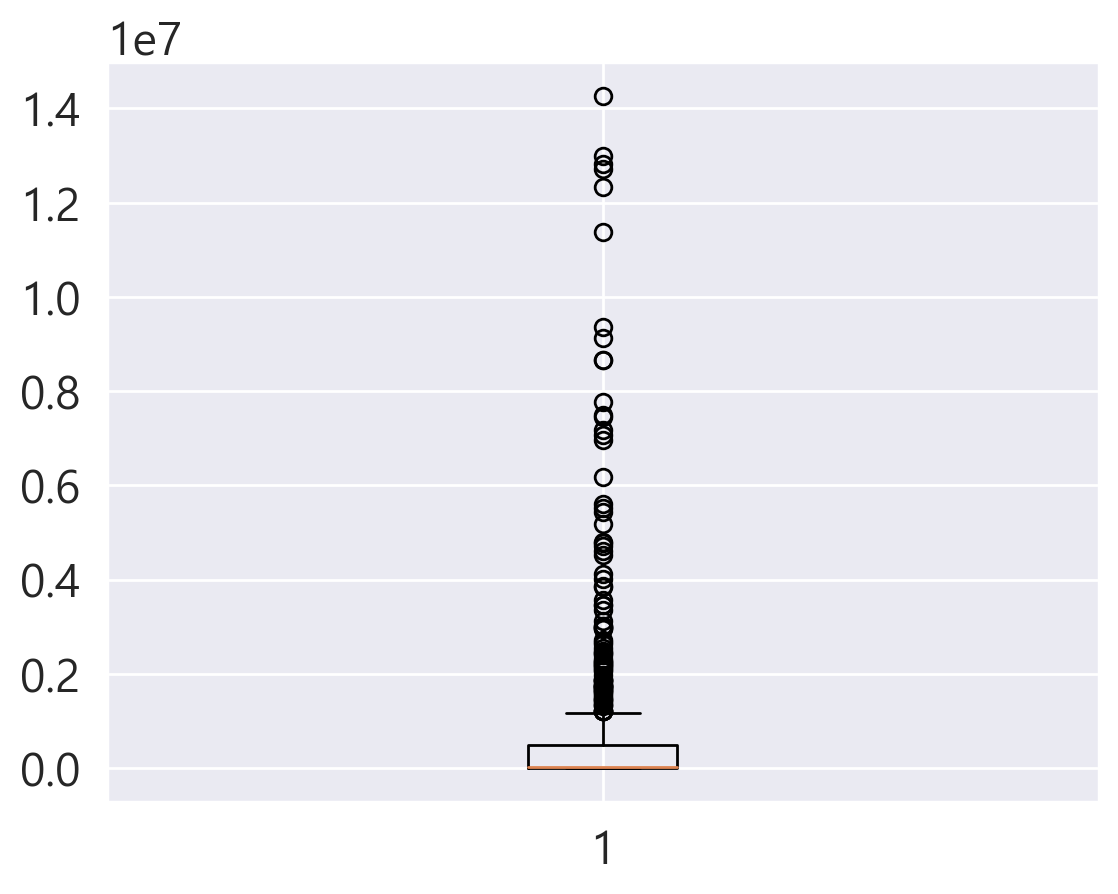

In [89]:
plt.boxplot(train['box_off_num'])
plt.show()
# 1부터 14262766 까지 다양한 관객수로 분포되어 있다. 

### 독립변수 살펴보기

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
 12  year            600 non-null    int64         
 13  month           600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(5)
memo

C:\Users\ahneunjeong\AppData\Local\Temp\ipykernel_15140\1033923574.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train[numerical_columns].hist(ax=ax)


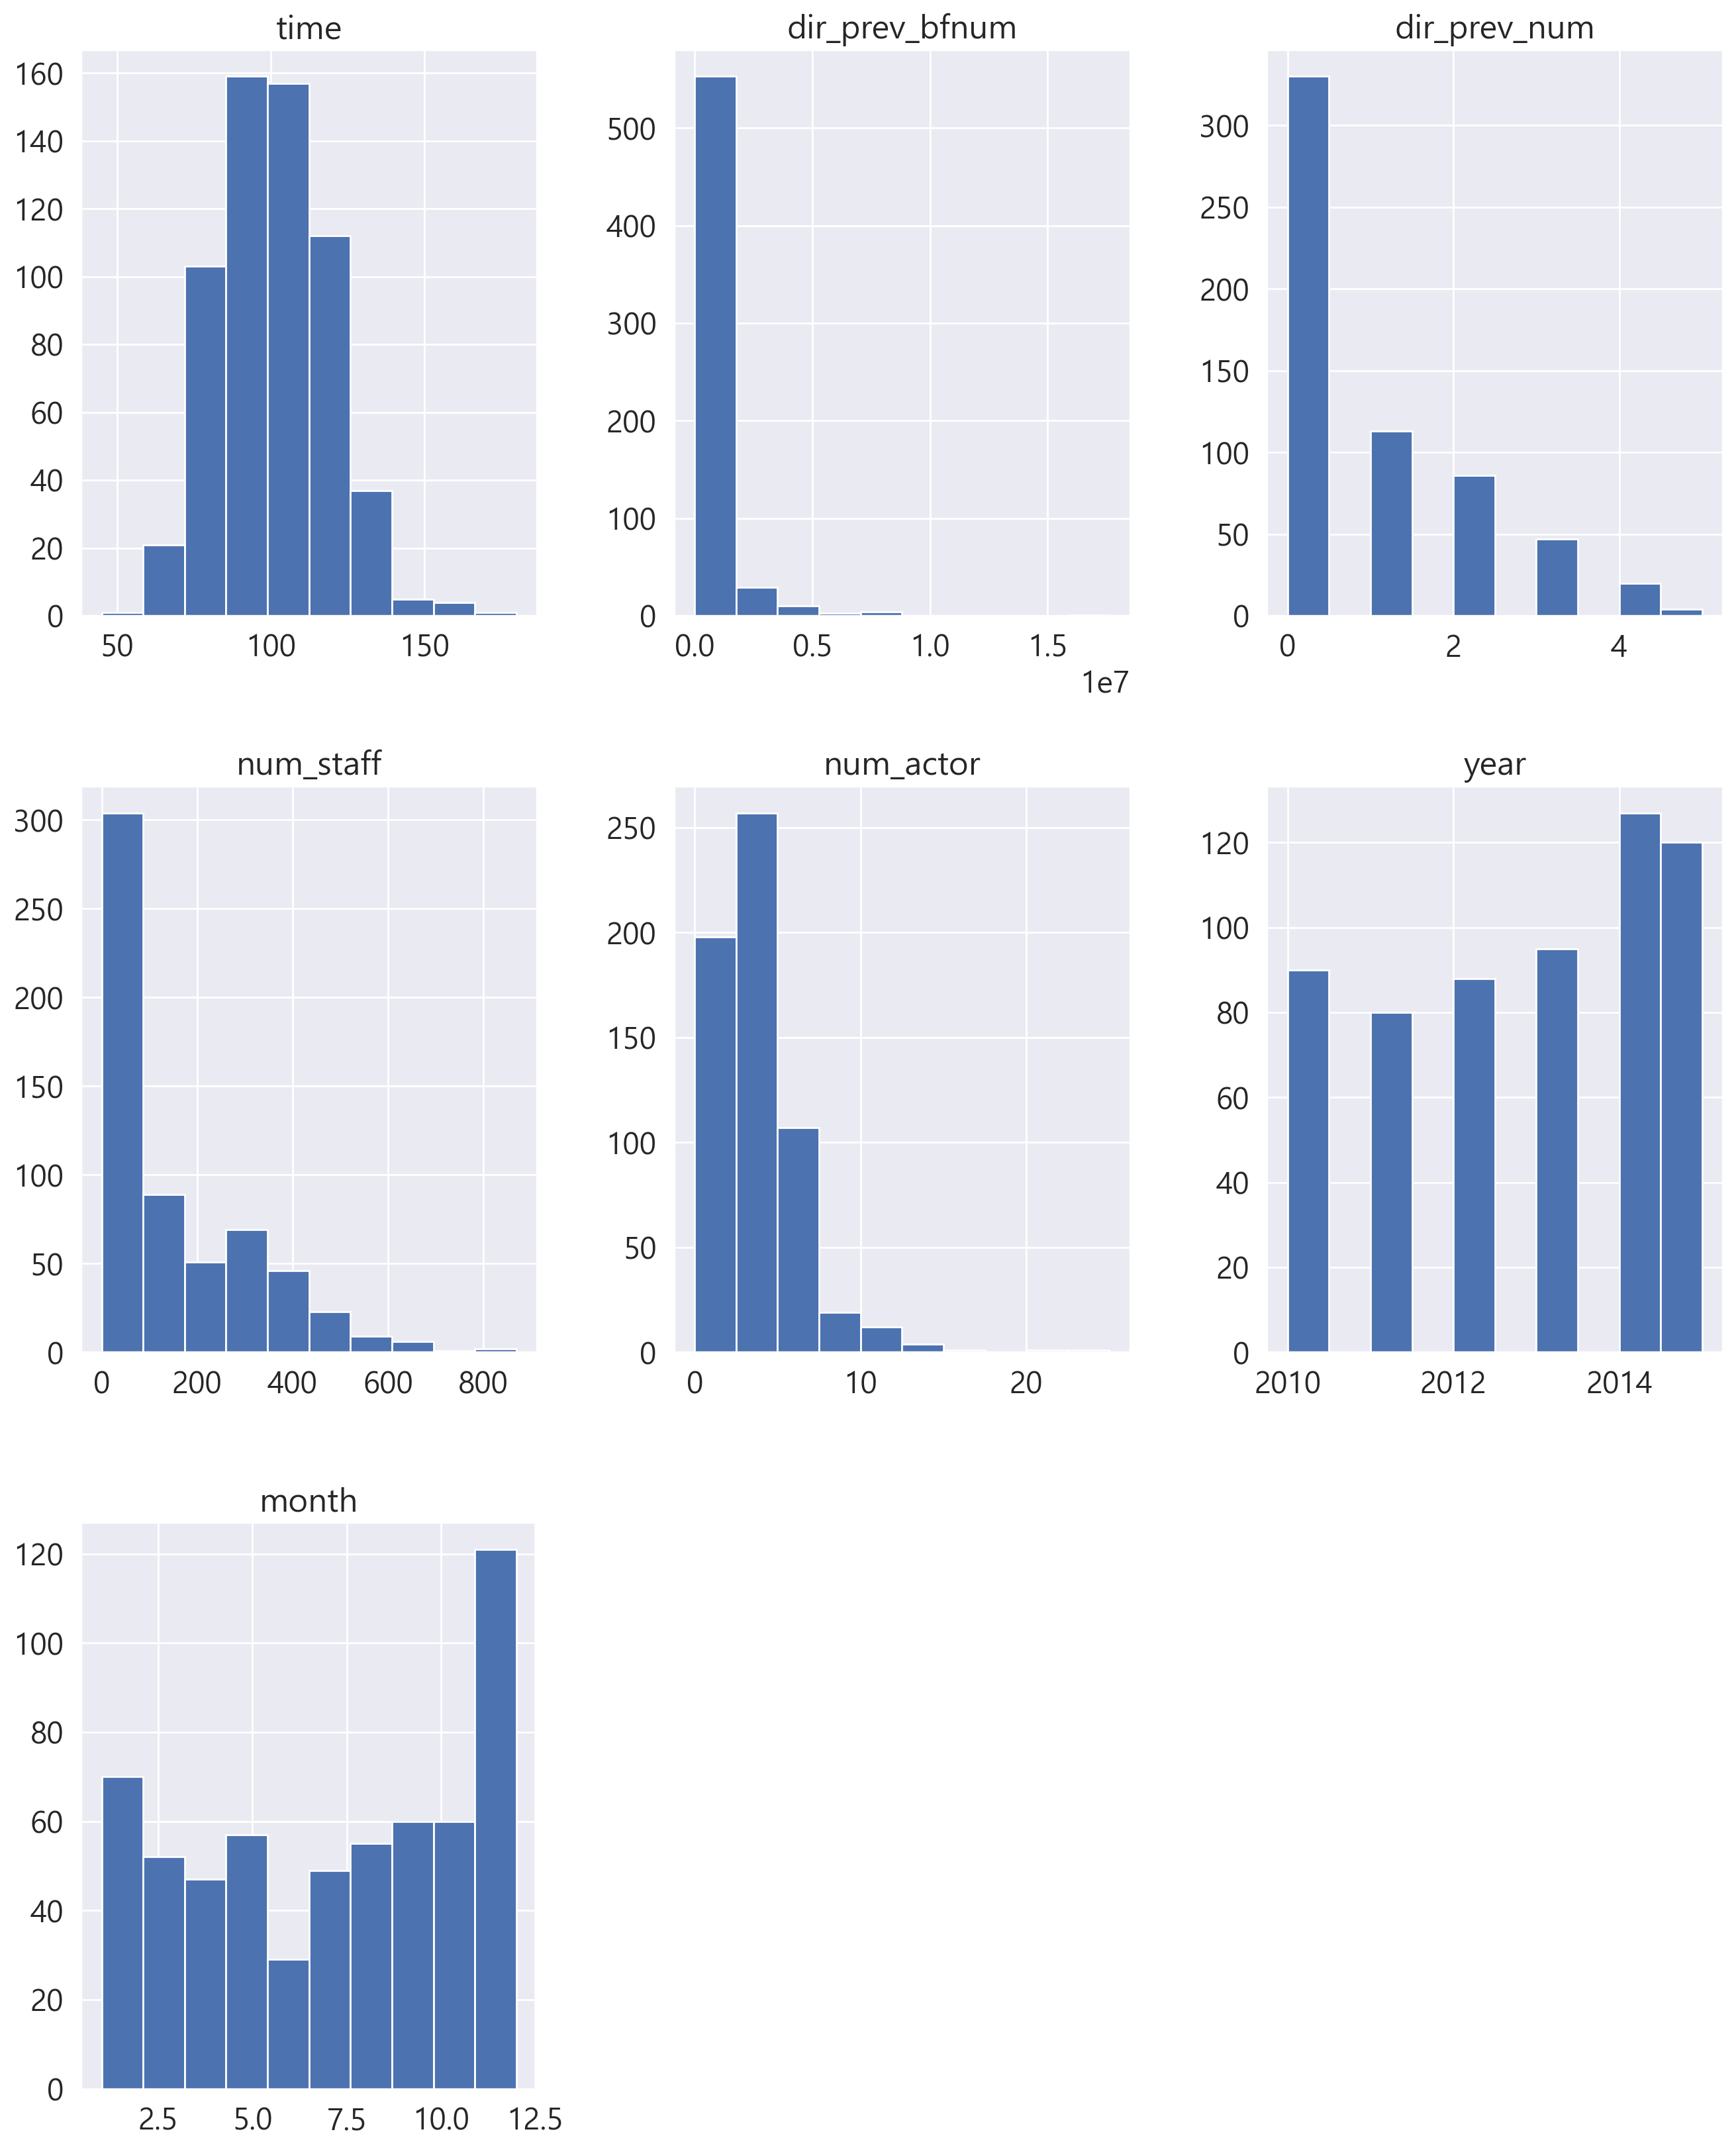

In [91]:
#numerical features
numerical_columns = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff','num_actor','year','month']

fig = plt.figure(figsize=(16,20))
ax = fig.gca()

train[numerical_columns].hist(ax=ax)
plt.show()
# dir_prev_bfnum와 그래프가 유사한 걸로 봐서 관련이 있어 보인다. 

### 독립변수와 종속변수 간의 관계 탐색

In [1]:
cols = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff','num_actor','box_off_num','year','month']

corr = train[cols].corr(method = 'pearson')

fig = plt.figure(figsize=(16,12))
ax = fig.gca()

sns.set(font_scale=1.5)
heatmap = sns.heatmap(corr.values, annot= True, fmt= '.2f',annot_kws={'size':15},
                     yticklabels = cols, xticklabels = cols, ax=ax, cmap='Blues')

plt.tight_layout()
plt.show()

NameError: name 'train' is not defined

In [93]:
## 종속변수와의 상관관계를 살펴보면
# 0.5를 넘는 것이 num_staff밖에 없어 양의 상관관계는 파악할 수 없다. 
## year가 -0.0인 것으로보아 관객수에는 완전한 음의 상관관계이다. 

### 독립변수와 종속변수 간의 관계 탐색 

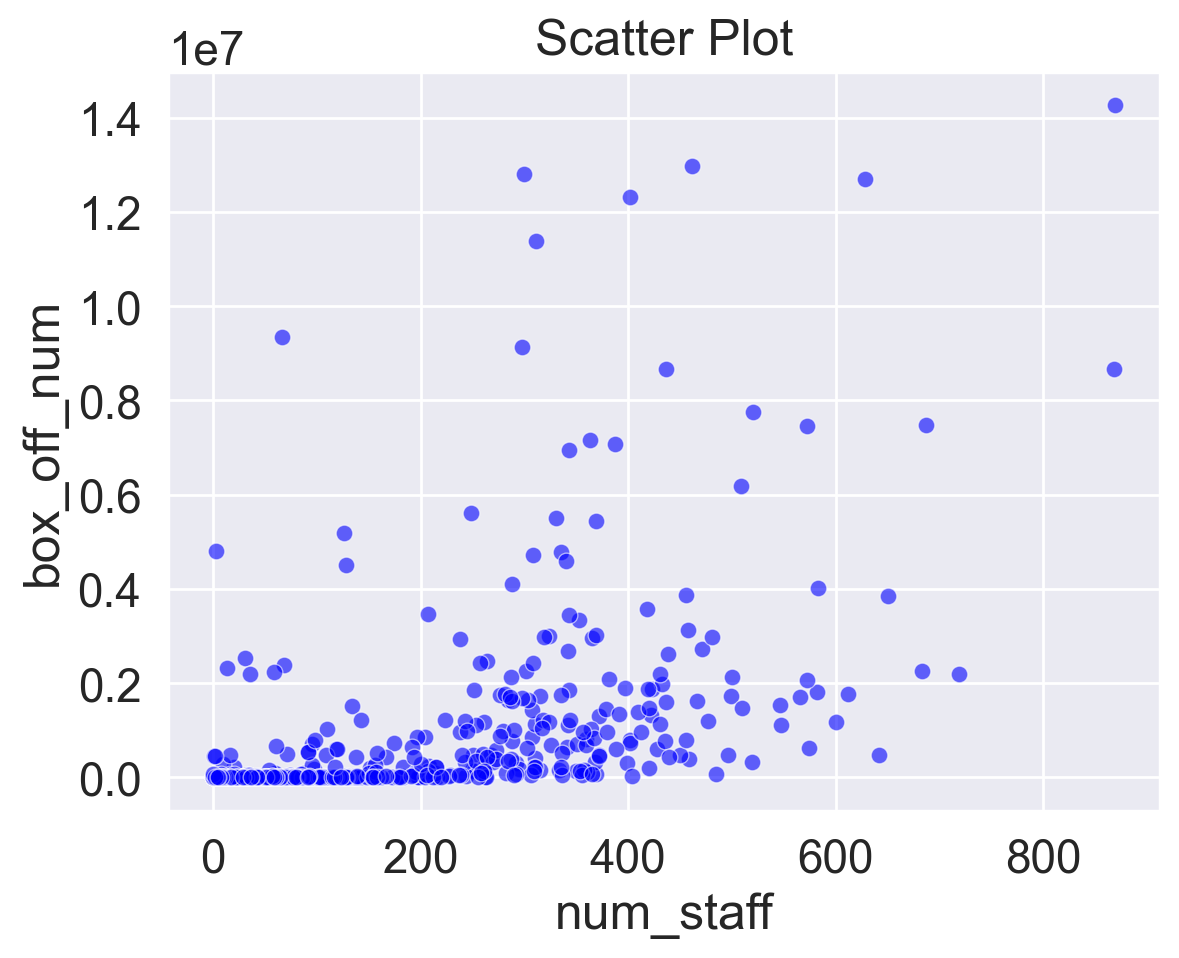

In [94]:
sns.scatterplot(data=train, x='num_staff', y='box_off_num', markers = 'o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [95]:
## 영화 관객의 수와 num_staff는 상관관계를 갖고 있지 않다. 
# 즉 스태프의 숫자는 영화 관객의 수에 영향을 주지 않는다. 

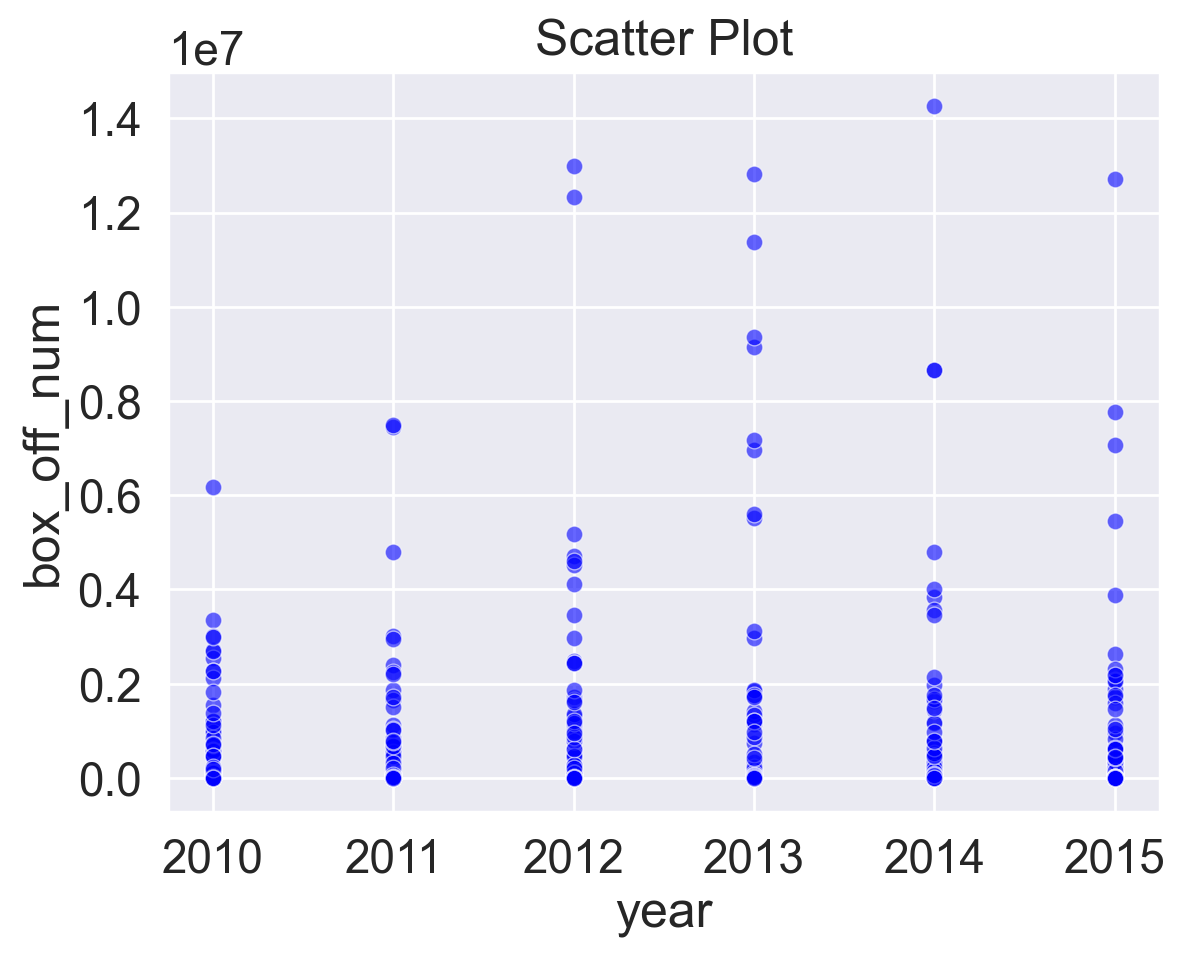

In [96]:
sns.scatterplot(data=train, x='year', y='box_off_num', markers = 'o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [97]:
## year는 관객수에 영향을 미치지 않는다

### 장르별 차이 탐색
영화 관객 수에는 장르가 관련이 있다고 생각하기에 장르별 차이를 탐색한다. 
1. title : 영화 제목    
2. distributor: 배급사     
3. genre : 영화 장르         
4. release_time: 개봉일
5. time: 상영시간(분)            
6. screening_rat: 상영등급
7. director: 감독        
8. dir_prev_bfnum : 해당 감독이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수
9. dir_prev_num : 해당 감독이 영화를 만들기 전 제작에 참여한 영화의 개수
10. num_staff: 스태프 수       
11. num_actor: 배우 수    
12. box_off_num: 관객 수 

In [98]:
train[['genre','box_off_num']].groupby('genre').mean().sort_values(by='box_off_num')
## 느와르의 관객수가 가장 많다.

,box_off_num
genre,
뮤지컬,6627.00000
다큐멘터리,67172.25806
서스펜스,82611.00000
애니메이션,181926.66667
멜로/로맨스,425968.03846
미스터리,527548.17647
공포,590832.52381
드라마,625689.79186
코미디,1193914.00000


In [99]:
# 그래프를 그리기 전 한글폰트 설정을 해준다. 
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\ahneunjeong\AppData\Local\Temp\ipykernel_15140\714562975.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


<Axes: xlabel='box_off_num', ylabel='genre'>

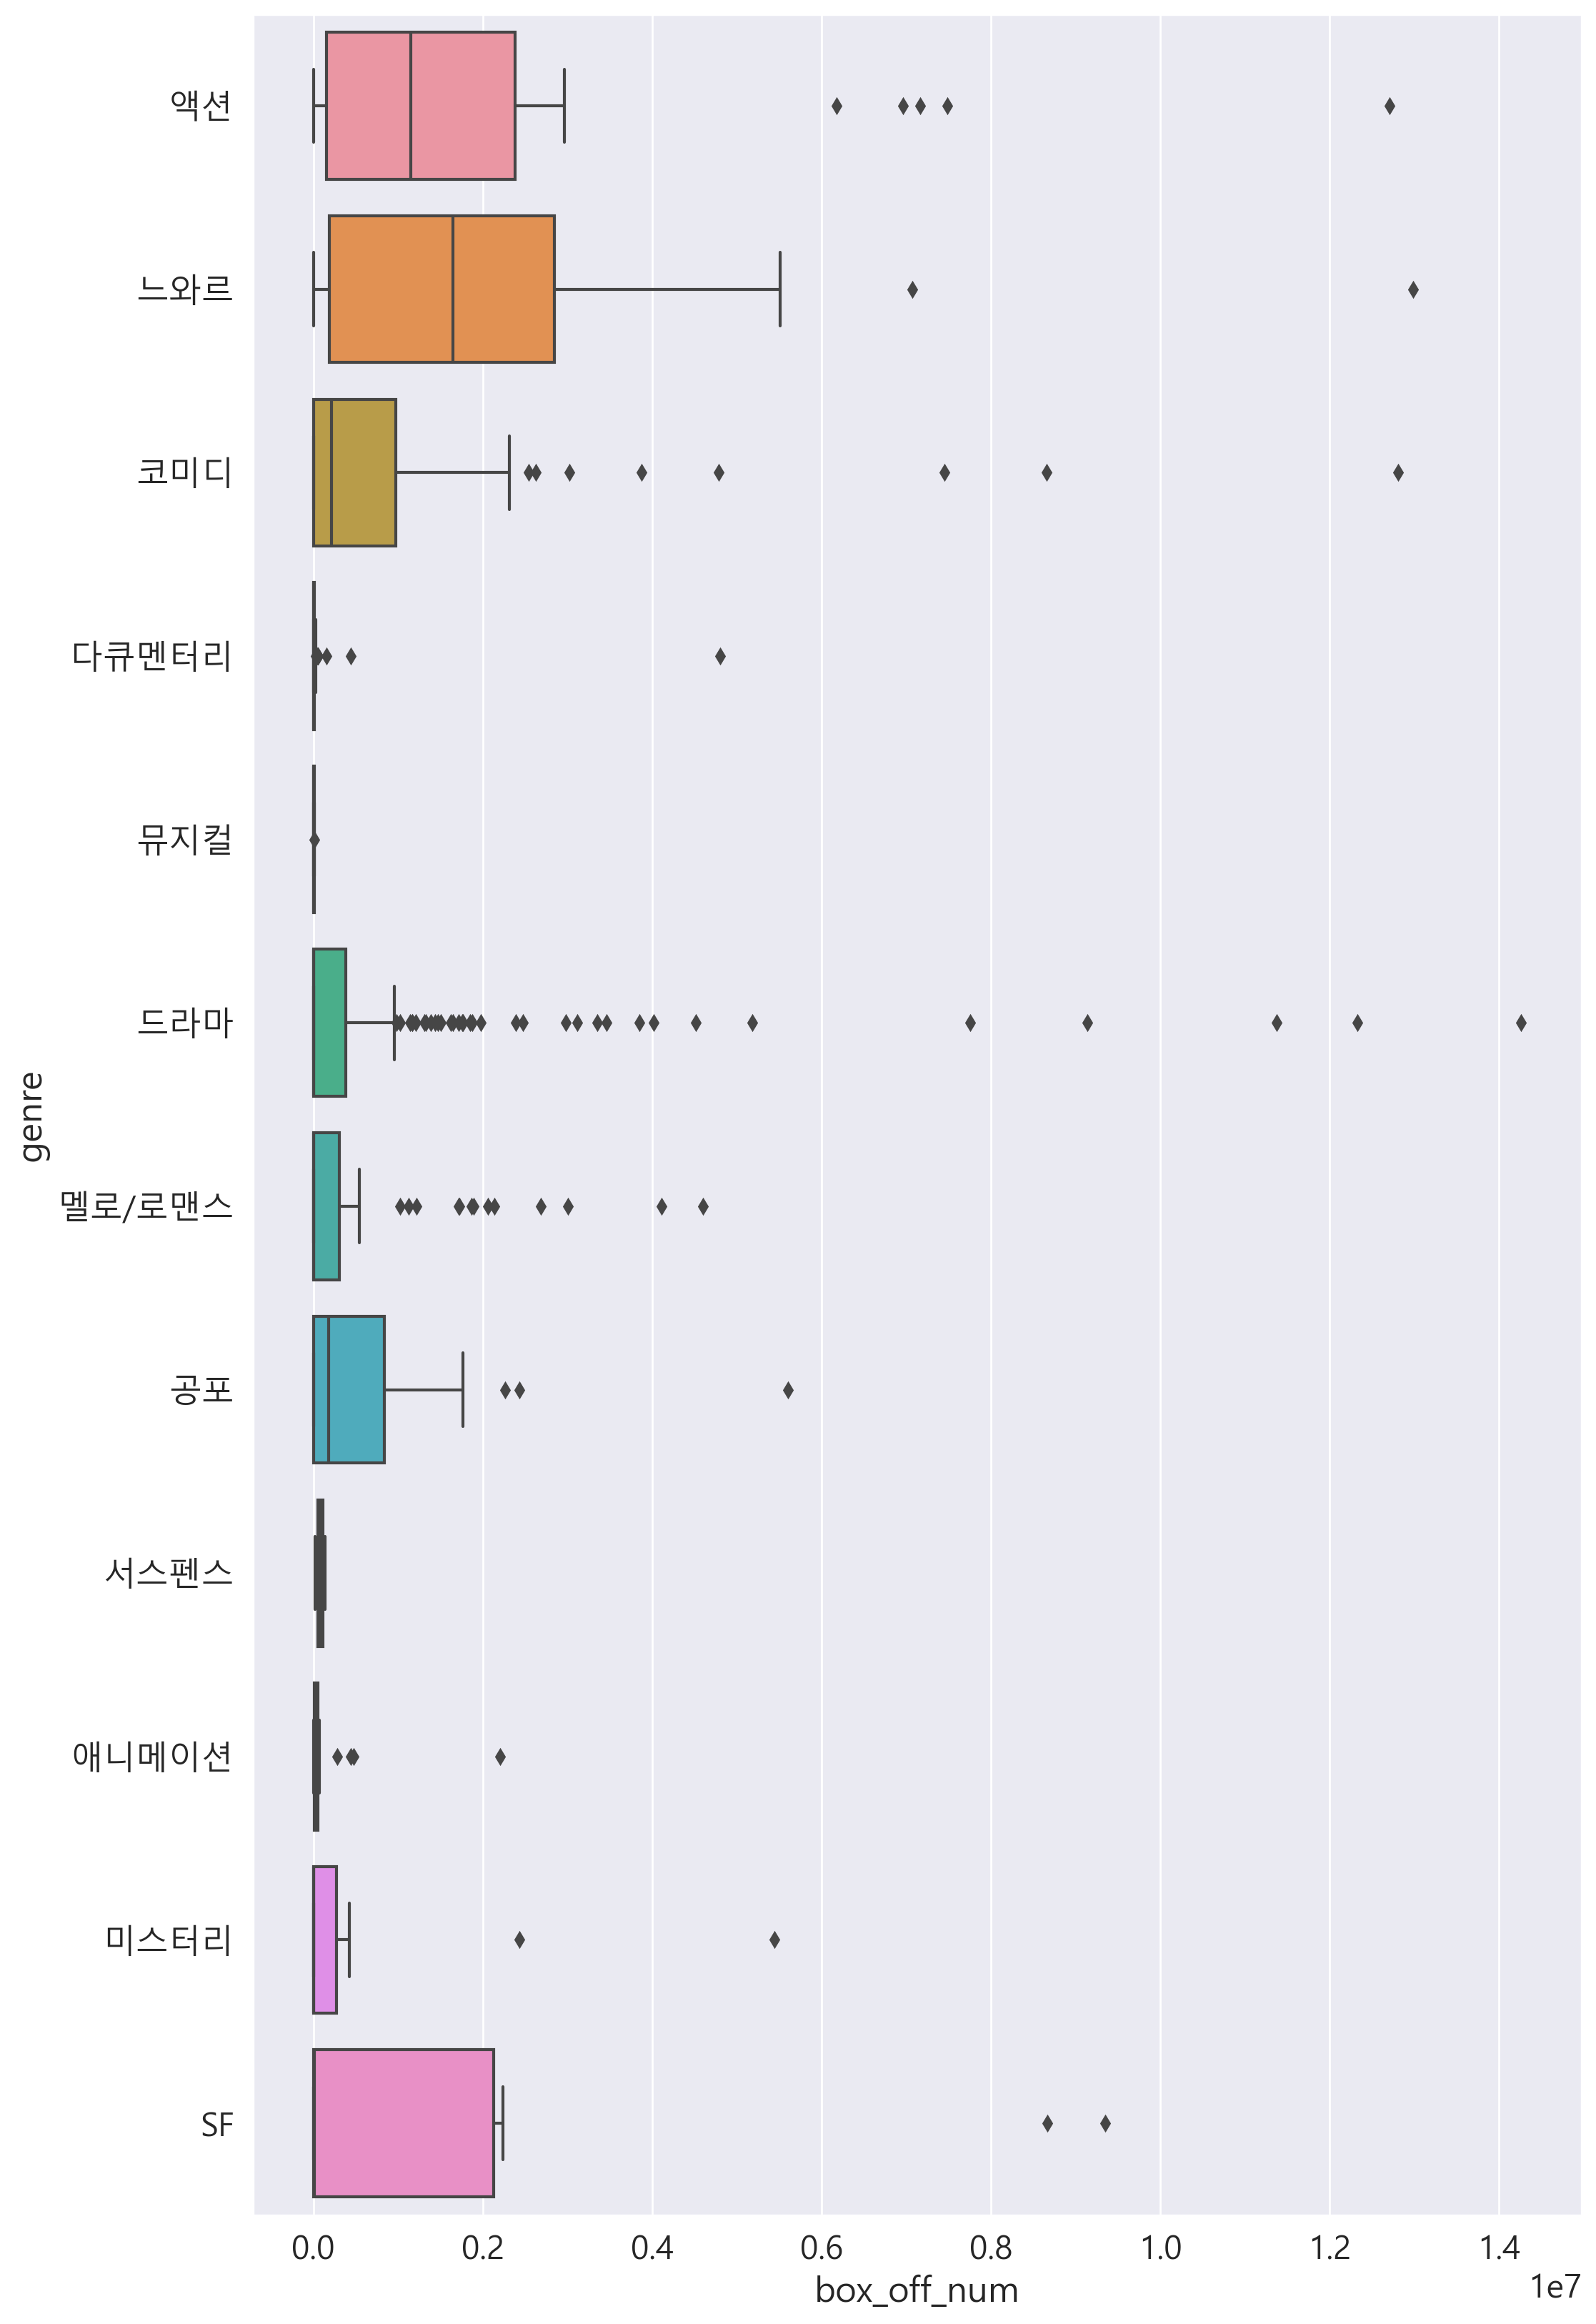

In [100]:
# 장르별 관객수 (boxplot이용)
fig = plt.figure(figsize=(12,20))
sns.boxplot(x='box_off_num', y='genre',data=train)

In [101]:
## 다큐, 뮤지컬, 서스펜스, 애니메이션의 관객수는 상대적으로 적다. 
## 느와르 장르를 많이 보는 걸 볼 수 있다. 

<Axes: xlabel='dir_prev_num', ylabel='genre'>

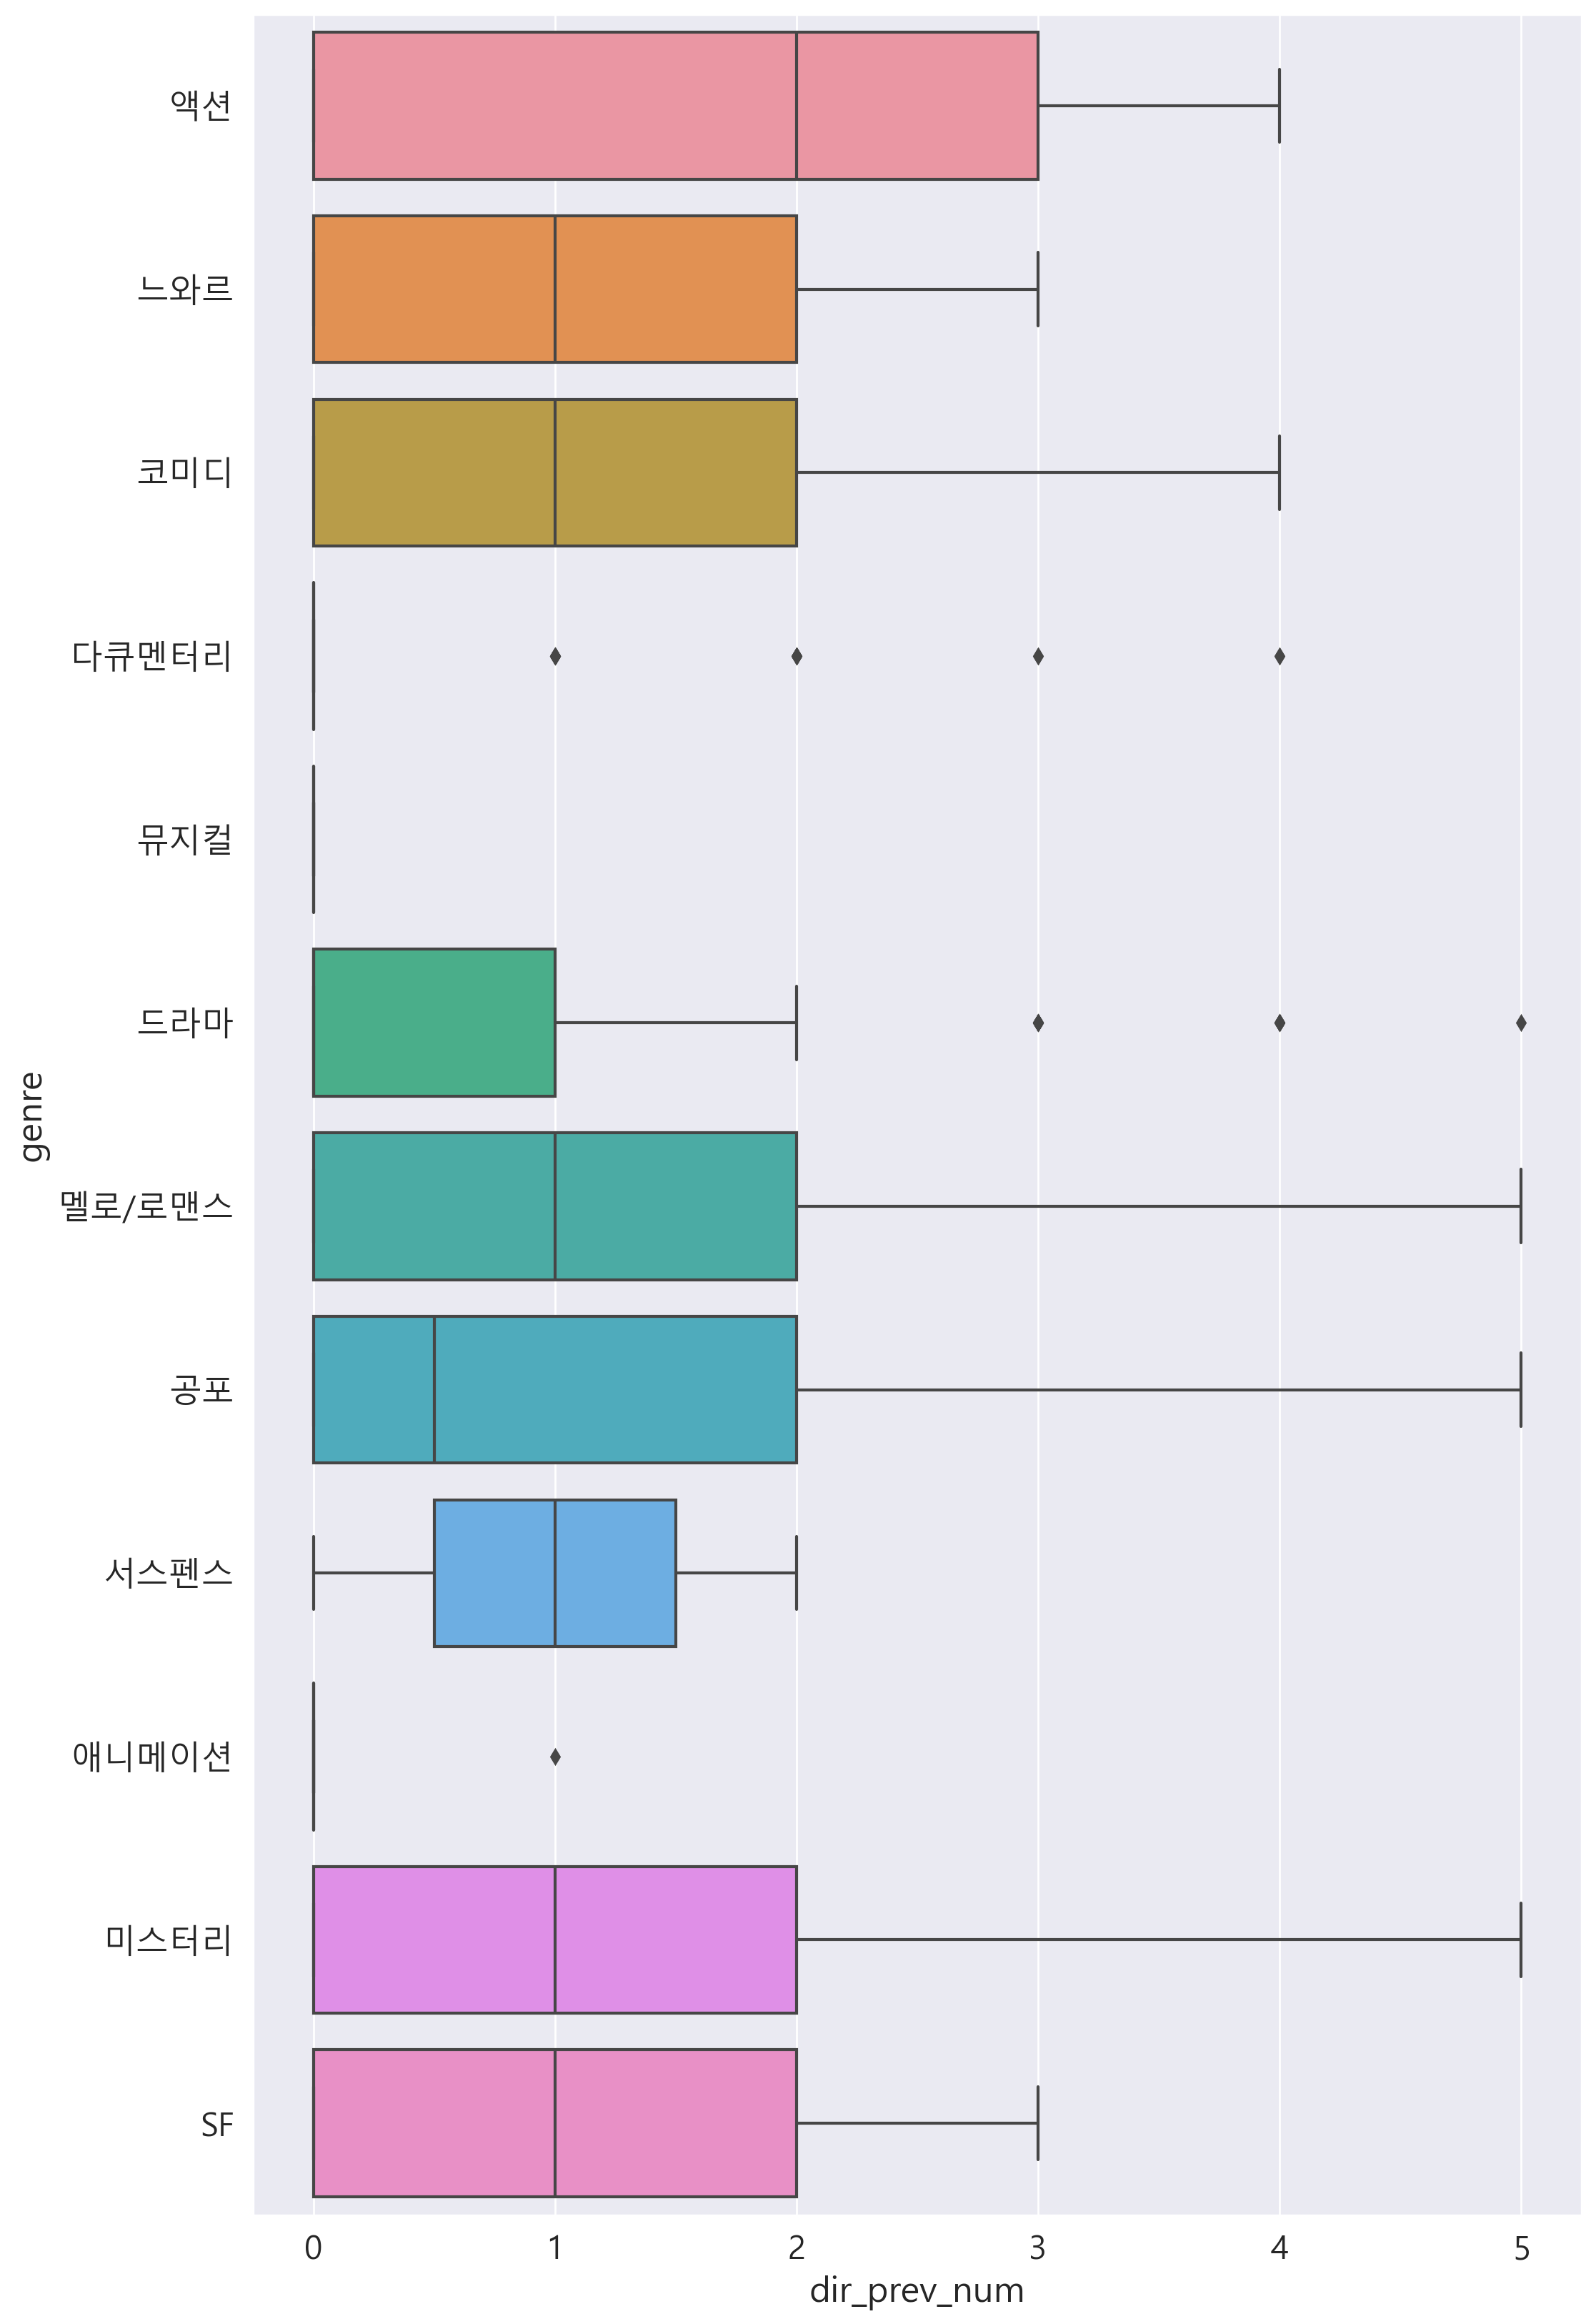

In [102]:
# 장르와 dir_prev_num의 특징을 살펴보겠다. 
fig = plt.figure(figsize=(12,20))
sns.boxplot(x='dir_prev_num',y='genre', data=train)

In [103]:
## 만드는 것에 난이도가 높은 액션, 느와르, SF는 
## 영화를 제작하기 전 제작에 참여한 개수가 높을 것 같았는데 예상이 맞았고, 
## 다큐, 뮤지컬, 애니메이션은 제작에 처음 참여한 감독이 많다. 새로운 신입감독이 제작을 하는 것은 관객수가 적은 것 같다. 

### 감독별 차이 탐색
- 영화를 선택할 때 감독이 누구인지도 많은 관련성이 있다고 생각하여 감독별 차이를 탐색하고자 한다. 

In [104]:
director = train['director'].unique()

In [105]:
print(len(director))
# director의 유효한 값이 너무 많아서 누적관객수 상위 20명의 감독만 보려고 한다. 

472


In [106]:
director = train[['director','title','box_off_num']].sort_values(by='box_off_num',ascending=False)

In [107]:
director_top20 = director.groupby('director').sum()['box_off_num'].sort_values(ascending=False).head(20)
director_top20 = director_top20.reset_index()
director_top20

,director,box_off_num
0,최동훈,25690504
1,이석훈,16425919
2,윤제균,14262766
3,추창민,13973002
4,이환경,13347092
5,우민호,11480550
6,강형철,11469079
7,양우석,11374879
8,류승완,9889560
9,봉준호,9350351


<Axes: xlabel='box_off_num', ylabel='director'>

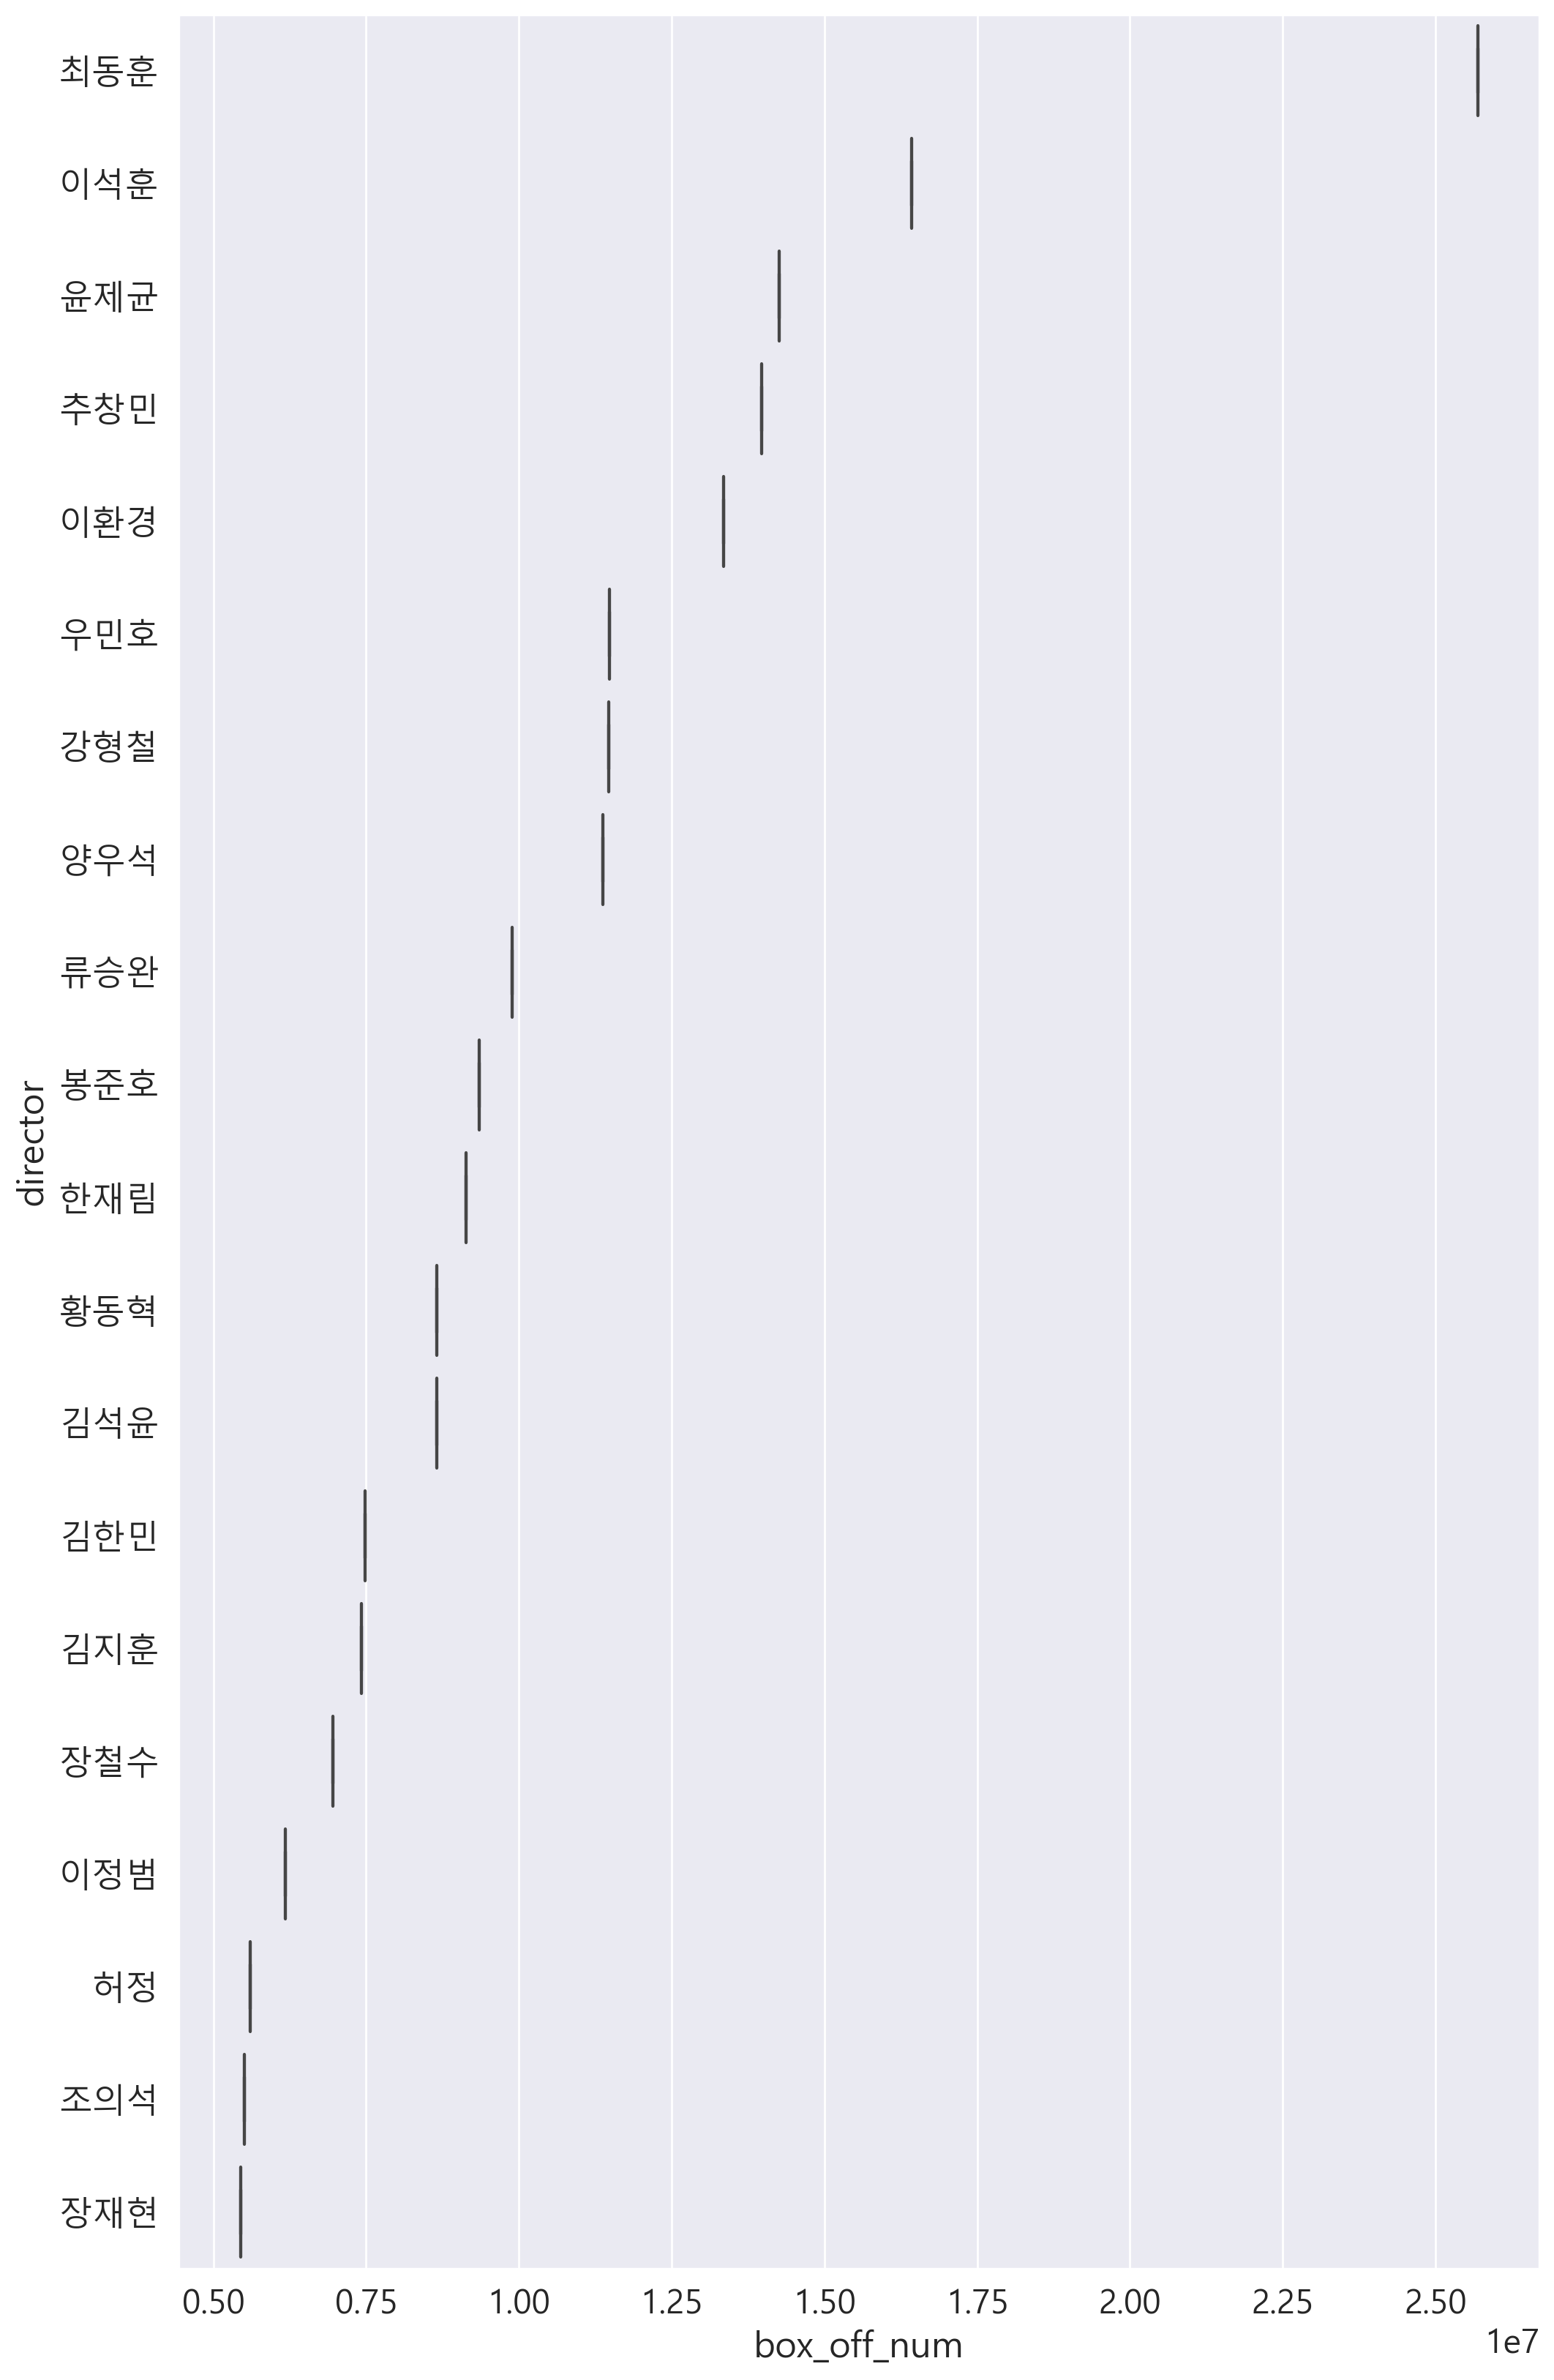

In [108]:
fig = plt.figure(figsize=(12,20))
sns.boxplot(x='box_off_num',y='director', data=director_top20)

In [109]:
## 암살과 도둑들의 감독인 최동훈의 영화는 관객수가 많았다. 

### 관객수 예측 모델링

In [110]:
train.head(3)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00000,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083,2013,6


In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
 12  year            600 non-null    int64         
 13  month           600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(5)
memo

### 데이터 전처리


In [112]:
## 사용하지 않을 컬럼들은 제거해준다.
train = train.drop(['director','title','distributor', 'release_time','screening_rat'],axis=1)


In [113]:
train.head(3)

,genre,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,액션,96,0.00000,0,91,2,23398,2012,11
1,느와르,130,1161602.50000,2,387,3,7072501,2015,11
2,액션,123,220775.25000,4,343,4,6959083,2013,6


In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre           600 non-null    object 
 1   time            600 non-null    int64  
 2   dir_prev_bfnum  600 non-null    float64
 3   dir_prev_num    600 non-null    int64  
 4   num_staff       600 non-null    int64  
 5   num_actor       600 non-null    int64  
 6   box_off_num     600 non-null    int64  
 7   year            600 non-null    int64  
 8   month           600 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 42.3+ KB


#### 범주형 데이터를 더미변수로
영화 관객수는 감독이 누구인지에 따라 변한다고 생각한다. 따라서 범주형 데이터인 'director'를 더미변수로 전환해주고 분석을 진행해주겠다.  


In [115]:
# train_dummies = pd.get_dummies(train, columns=['genre'])
# train_dummies.head()
gg = pd.get_dummies(train['genre'])
gg = gg.astype(int)
train.drop('genre', axis=1, inplace=True)
train_dummies= pd.concat([train,gg],axis=1)
## 원래 pd.get_dummies(train, columns=['genre'])를 사용했는데 데이터처리가 잘못됐는지,
## True, Fasle값이 나와 위의 방식으로 다시 genre컬럼을 더미변수로 만들어주었다. 

#### 표준화
- Feature들의 scale차이를 없애기 위해 표준화를 진행한다. 
- 문자형 변수인 'title', 'distributor', 'genre', 'screening_rat', 'director'와 datetime 변수인 'release_time'은 제외한다. 

In [116]:
# !pip install scikit-learn

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_columns = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor', 'year', 'month']
train_dummies[scale_columns] = scaler.fit_transform(train_dummies[scale_columns])


In [118]:
train_dummies[scale_columns].head(3)

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,year,month
0,-0.26895,-0.36129,-0.74142,-0.36322,-0.69807,-0.43362,1.17585
1,1.61132,0.52653,0.95003,1.42512,-0.28904,1.30472,1.17585
2,1.22421,-0.19255,2.64147,1.15929,0.11998,0.14583,-0.29826


#### training/test set 나누기

In [119]:
from sklearn.model_selection import train_test_split

X = train_dummies.drop('box_off_num',axis=1)
y = train_dummies['box_off_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [120]:
X_train.shape, y_train.shape

((480, 19), (480,))

In [121]:
X_test.shape, y_test.shape

((120, 19), (120,))

#### 다중공산성 판단

# 조대따 처음부터 다시 하자 (내일 할래)
- 다중공산성 판단이 갑자기 다른 값이 나와서.. 그냥 새로운 파일에 새로 쓰면서 다시 하는게 나을 것 같다. 파일이 아마 겹친듯 내일 다시 하자 은덩아 화이팅~!

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)

,features,VIF Factor
0,time,1.80000
1,dir_prev_bfnum,1.30000
2,dir_prev_num,1.40000
3,num_staff,2.20000
4,num_actor,1.10000
5,year,1.10000
6,month,1.00000
7,SF,1.00000
8,공포,1.00000
9,느와르,1.00000


In [ ]:
## nemeric한 변수들은 VIF값이 잘 나왔지만, 더미변수들은 inf로 나왔다..

### 회귀모델링

In [ ]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

pred_test = lr.predict(X_test)

In [ ]:
coefs = pd.DataFrame(zip(train_dummies[scale_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

In [ ]:
coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

In [ ]:
plt.figure(figsize = (8, 8))

plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

### 유의성 검정

In [ ]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)

model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()
# p-value는 0.05보다 작을 때 유의미함, 정확도
# p-value가 0.05보다 클 때는 고려하지 않음

해설
1. dir_prev_num(감독 이전 영화 제작개수), num_actor(주연배우 수), year, month, genre_SF, genre_뮤지컬, 미스터리는 유의하지 않습니다. (p value > 0.05)
2. [Positive] 변수 설명: 영화 관객수에 영향을 미치는 것
    - num_staff : 스태프들의 수
    - time	: 상영시간
    - dir_prev_bfnum: 감독의 이전 영화 관객수
    - genre_느와르
    - genre_다큐멘터리
    - genre_애니메이션
    - genre_액션
    - genre_코미디
3. [Negative]변수 설명
    - genre_공포
    - genre_드라마
    - genre_멜로/로맨스
    - genre_서스펜스

### 모델의 시각화

In [ ]:
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

#### 모델의 성능평가

In [ ]:
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set
# 처참한.. 확률이다. 

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train))) 
# train error 구함

# test set
print(sqrt(mean_squared_error(y_test, pred_test)))
# test error 구함

# 기대효과 및 인사이트

 나는 감독이 누구인지가 영화관객수에 영향을 많이 미칠 것이라고 생각했다. 그래서 감독 컬럼을 더미변수로 만들고 회귀분석을 진행하려고 했으나, 이렇게 하면 컬럼의 수가 너무 많아져 선형회귀모델로 분석하는 것이 맞지 않다고 생각했다. 그래서 장르만 더미변수로 변환하여 진행하였는데 이것들은 다중공산성이 크게 나와 문제가 있다. 
 영화 관객수에 positive한 영향을 미치는 것에는 스태프의 수, 상영시간, 감독의 이전 영화 관객수, 장르(느와르, 다큐, 애니메이션, 액션, 코미디)가 negative한 영향을 미치는 것은 장르가 공포, 드라마, 멜로, 서스펜스가 있었다. 

또한 모델의 R square가 -0.5이고, RMSE가 1360574로 나와 내가 진행한 모델의 성능은 매우 안 좋다...